### Tutorial 10

We will continue with the example of [section 6.3](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/6%20Modeling%20stoichiometry%20variations/Oxygen%20starvation%20in%20batch%20fermenters.ipynb). Below the physiological properties of the microbe as given before:

|$\alpha \qquad \qquad$|$\gamma \qquad \qquad $|$\mu_{max} \qquad$|$\theta_{max}\qquad$| $(P/O)$ $\qquad \qquad$
|----|-|-|-|-
|$\frac{cmol\,CO_2}{cmol \, X}$|$\frac{mol \, ATP}{Cmol \, X}$|$\frac{1}{h}$|$\frac{mol \, ATP}{cmol\,X\cdot h}$|$\frac{mol\,ATP}{mol\, O}$
|0.1|2.5|0.3|0.1|1.5

The biomass formula is given by $CH_{1.8}O_{0.5}N_{0.2}$

The following Monod characteristics are known:

|$K_M\left[\frac{mg}{L} \right] \qquad$ |
 -|-
 **Growth**|30 
**Maintenance**|5 

Since only $CO_2$ will be formed as product, zero product inhibition is present. The following conditions are specified for the batch fermenter:

|V [$L$]|$C_X^o \left[ \frac{g}{L}\right]$|$C_S^o \left[ \frac{g}{L}\right]$
|-------------|-------|------
|2000|0.025 $\qquad$|150 $\qquad$

We can now define the parameters:

In [68]:
import numpy
from numpy import interp, asarray, argmax
import matplotlib.pyplot as plt
%matplotlib notebook 
from scipy.integrate import odeint
alpha, gamma, mu_max, theta_max, PO = 0.1, 2.5, 0.3, 0.1, 1.5
Km_mu, Km_theta = 30/1000/30, 5/1000/30
Mx=12+1.8+0.5*16+0.2*14
V, Cxo, Cso = 200, 0.025/Mx, 150/30

We can also define $k_La$ and $C_{O_2}^{sat}$ as 200$\frac{1}{h}$ and 7$\frac{mg}{L}$: 

In [69]:
kla=200
Co_s_max=7/1000/32  #mol/l

The flux model is given below. Note that carbon splits between biomass and respiration.

<img src="respv2.png" width="700" />

In [70]:
def response_fun(C):
    
    Cx, Cs = C          
    mu=mu_max*Cs/(Km_mu+Cs)
    theta=theta_max*Cs/(Km_theta+Cs)
    
    ro_mt=kla*Co_s_max
    
    Sbase = numpy.matrix([[-1,1.1,1,0,0],   #Stoichiometric matrix without specification (4x5)
                         [0,0.1,1,0,-1],
                         [0,0.1,2,-2,0],
                         [0,-2.5,2/3,3,0]])
    
    S1 = numpy.vstack([Sbase,[0,1,0,0,0]])  #Stoich matrix with growth spec
      
    C= numpy.matrix([[0,0,0,theta, mu]]).T
    r = numpy.linalg.solve(S1,C)            #rates for regime where no oxygen limitation exist
    
        
    if ro_mt > r[3,0]*Cx:     #no oxygen limitation
        
        return [r[1,0],      #biomass 
                -r[0,0],
                r[4,0],      # CO2 formation
                r[3,0]]      # O2 consumption                                                 
     
    else:
        
        S2 = numpy.vstack([Sbase,[0,0,0,1,0]])          #Stoich matrix with oxygen spec

        C2= numpy.matrix([[0,0,0,theta,ro_mt/Cx]]).T   # Note the ro specification!!
        r2 = numpy.linalg.solve(S2,C2)                 # rates for regime where oxygen limitation exist
        
        
        return [r2[1,0],
                -r2[0,0],
                r2[4,0],    #CO2 formation
                r2[3,0]]    #O2 consumption  

In [71]:
def ferm_eq(C,t):
    Cx, Cs = C[0],C[1]
    r=response_fun([Cx, Cs])     
    
    return [r[0]*Cx,
            r[1]*Cx]    
            

<IPython.core.display.Javascript object>


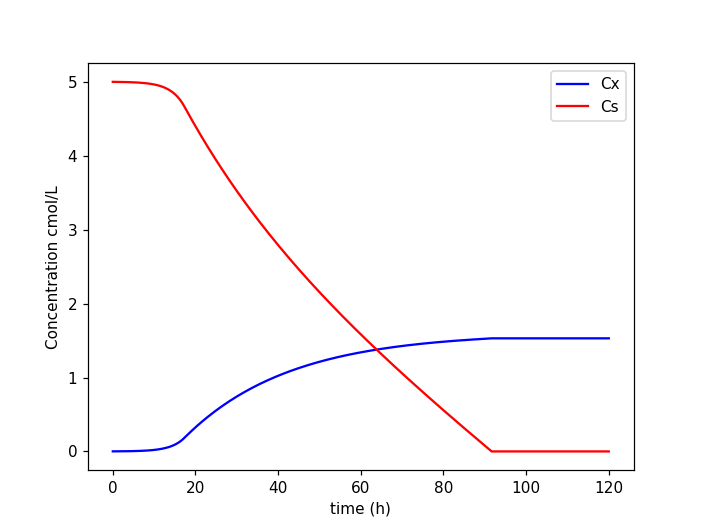

In [72]:
Co=[Cxo, Cso]                     # [Cxo, Cso, Cgo, Ceo] in cmol/L
tmax=120                                   # Integrate for 20 hours  
tspan=numpy.linspace(0,tmax,200)           # define the timespan of the integration
Ci = odeint(ferm_eq, Co, tspan)             # integration via odeint that calls apon ferm_eq

Cx=Ci[:,0]                                  
Cs=Ci[:,1]


plt.figure(2)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='red', label='Cs')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()

a) Determine $[\mu, -r_S, r_{O_2}]$ at 10, 30 and 90 hours. Explain the differences.

(Tip: redefine tspan with 121 elements so that the index corresponds to the time value)

b) What is the minimum value of $r_{O_2}$ for a cell to survive? No integration required. $[0.0272 \frac{mol}{cmol \, X \cdot h}]$

(Tip: Copy the matrix from the response function, alter accordingly and solve the matrix manually (not using any functions).

c) Given the value in (b), that is the maximum possible $C_X$ that the fermenter can sustain. $[1.604 \frac{cmol}{L}]$

(Tip: $r_{O_2}^{mt}=r_{O_2}^V=r_{O_2}C_X$)

d) How does the answer in (c) compare to the final $C_X$ achieved in the fermentation? 

e) Play around by increasing $C_{S}^o$ and the fermentation time. Does the final $C_X$ get closer to the maximum value in (c)?

f) At what point in time is the maximum volumetric supply of oxygen fully utilised? [approx 17 hours]

g) Plot $\mu$ as a function of time. Explain the profile.

h) Determine the fraction of glucose spent on growth at 18 and 80 hours. [94% and 17%]

i) Increase the value of $k_La$ to 600 $\frac{1}{h}$ an plot the results against the original profiles. Explain the difference.



<IPython.core.display.Javascript object>


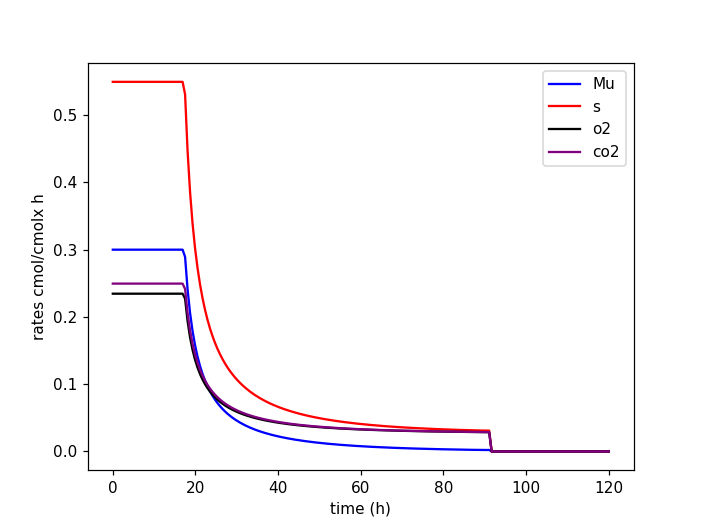

<IPython.core.display.Javascript object>


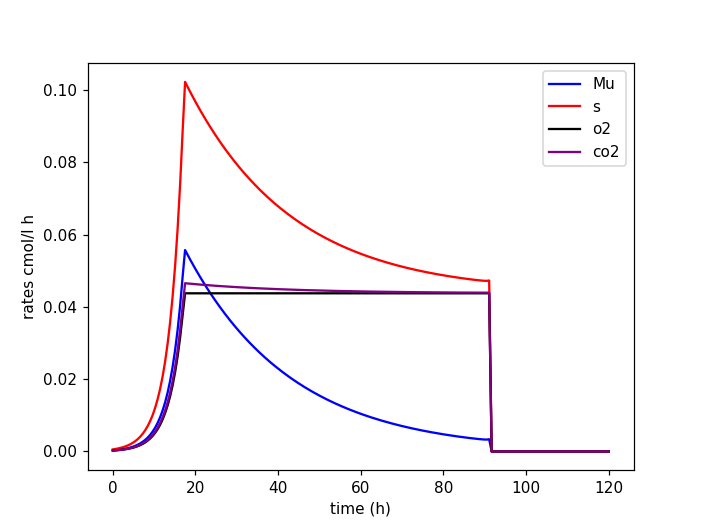

MU_10 =  0.2999395812052637
sugar rates at 10 =  0.5494393553264889
oxygen rates at 10 =  0.23450279506096205
MU_30 =  0.04579339398097834
sugar rates at 30 =  0.1069935732916004
oxygen rates at 30 =  0.05891050961157315
MU_90 =  0.0021627051744465015
sugar rates at 90 =  0.03097834386922153
oxygen rates at 90 =  0.02870750343605271


In [73]:
#A

rate = asarray([response_fun(x) for x in Ci])

Mu =rate[:,0]    # rates of Biomass
rates_S = -rate[:,1]    #rates of Sugar
rates_o2 = rate[:,3]   # rates 0f o2
rates_co2 = rate[:,2]



plt.figure(3)
plt.plot(tspan, Mu, color='blue', label='Mu')
plt.plot(tspan, rates_S, color='red', label='s')
plt.plot(tspan, rates_o2, color='black', label='o2')
plt.plot(tspan, rates_co2, color='purple', label='co2')
plt.legend(loc='best')
plt.ylabel('rates cmol/cmolx h') 
plt.xlabel('time (h)') 
plt.show()


#volumetric rates
Mu_V=Mu*Cx
S_V=rates_S*Cx
o2_V=rates_o2*Cx
co2_V=rates_co2*Cx

plt.figure(4)
plt.plot(tspan, Mu_V, color='blue', label='Mu')
plt.plot(tspan, S_V, color='red', label='s')
plt.plot(tspan, o2_V, color='black', label='o2')
plt.plot(tspan, co2_V, color='purple', label='co2')
plt.legend(loc='best')
plt.ylabel('rates cmol/l h') 
plt.xlabel('time (h)') 
plt.show()

"question A"

# rates at 10 minutes
MU_10 = interp(10,tspan,Mu)
print("MU_10 = ",MU_10)
rates_s_10 = interp(10,tspan,rates_S)
print("sugar rates at 10 = ",rates_s_10)
rates_o2_10 = interp(10,tspan,rates_o2)
print("oxygen rates at 10 = ",rates_o2_10)

# rates at 30

MU_30 = interp(30,tspan,Mu)
print("MU_30 = ",MU_30)
rates_s_30 = interp(30,tspan,rates_S)
print("sugar rates at 30 = ",rates_s_30)
rates_o2_30 = interp(30,tspan,rates_o2)
print("oxygen rates at 30 = ",rates_o2_30)

# rates at 90
MU_90 = interp(90,tspan,Mu)
print("MU_90 = ",MU_90)
rates_s_90 = interp(90,tspan,rates_S)
print("sugar rates at 90 = ",rates_s_90)
rates_o2_90 = interp(90,tspan,rates_o2)
print("oxygen rates at 90 = ",rates_o2_90)


[Back to all tutorials](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/All%20tutorials.ipynb)

In [74]:

"question B"

#i = argmax(Mu==Mu_min)
#O2_min=rates_o2[i]

o2_min = interp(110,tspan,rates_o2)

print("minimum oxygen required = ",o2_min)

"question C"

#Cx_max = max(Cx)
#print("Cx_max = ",Cx_max)


kla=200
Co_s_max=7/1000/32  #mol/l

r_mt = kla*Co_s_max

Cx_max = r_mt/ 0.0272

print("Cx_max = ",Cx_max)

Cx_max_fer = max(Cx)
print("Cx_max_fer = ",Cx_max_fer)

minimum oxygen required =  -2.4691396898253493e-23
Cx_max =  1.6084558823529413
Cx_max_fer =  1.53016575946


In [75]:
"question D camparison"

"question E, play around with Cso and time"

"question F, maximum volumetric supply of oxygen is fully utilised"
" where graph of Mu_V is at its max"

o2_V_max= max(Mu_V)
i = argmax(o2_V_max==Mu_V)

print("time = ",tspan[i])

o2_V_max= max(Mu_V)
i = argmax(Mu_V)

print("time = ",tspan[i])

time =  17.4874371859
time =  17.4874371859


In [76]:
"question H solve for (rates_X*1.1)/rates_S at 18 and 90 hours"

rx_18 = interp(18,tspan,Mu)

rs_18 = interp(18,tspan,Cs)

#theta=theta_max*Cs_18/(Km_theta+Cs_18

#print(rs_18)
#print(rx_18)

#answer = (rx_18*1.1)/rs_18
         
#print(answer)
"""
yeild= rates_S[18]/Mu[18]

print("yeild = ",yeild)

Cx_18 = interp(18,tspan,Cx)

print("Cx_18= ",Cx_18)

Cs_18=interp(18,tspan,Cs)

#frac_Cs_80 = Cs_80/Cso

frac_Cs_18 = (Cx_18*yeild)/Cs_18
             
print("frac_Cs_18 = ",frac_Cs_18)

Cs_80=interp(80,tspan,Cs)

frac_Cs_80 = Cs_80/Cso

print("frac_Cs_80 = ",frac_Cs_80)

"""

'\nyeild= rates_S[18]/Mu[18]\n\nprint("yeild = ",yeild)\n\nCx_18 = interp(18,tspan,Cx)\n\nprint("Cx_18= ",Cx_18)\n\nCs_18=interp(18,tspan,Cs)\n\n#frac_Cs_80 = Cs_80/Cso\n\nfrac_Cs_18 = (Cx_18*yeild)/Cs_18\n             \nprint("frac_Cs_18 = ",frac_Cs_18)\n\nCs_80=interp(80,tspan,Cs)\n\nfrac_Cs_80 = Cs_80/Cso\n\nprint("frac_Cs_80 = ",frac_Cs_80)\n\n'

<IPython.core.display.Javascript object>


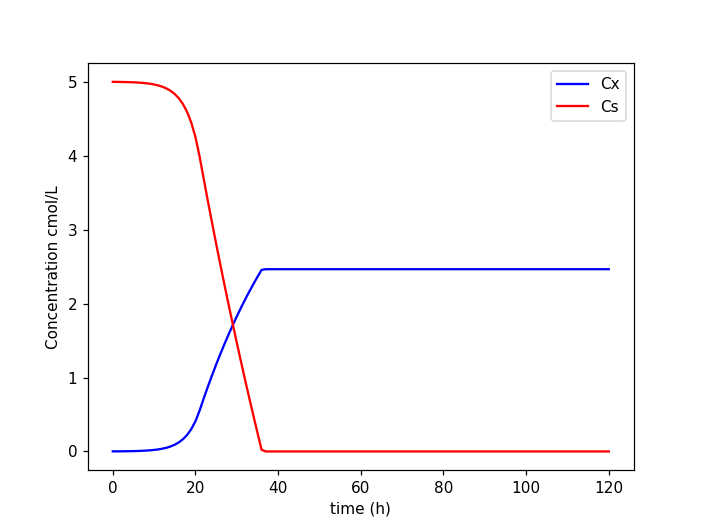

In [77]:
"question I just change Kla value to 600 then compare graphs of concetration"

kla=600
Co=[Cxo, Cso]                     # [Cxo, Cso, Cgo, Ceo] in cmol/L
tmax=120                                   # Integrate for 20 hours  
tspan=numpy.linspace(0,tmax,121)           # define the timespan of the integration
Ci = odeint(ferm_eq, Co, tspan)             # integration via odeint that calls apon ferm_eq

Cx=Ci[:,0]                                  
Cs=Ci[:,1]


plt.figure(5)
plt.plot(tspan, Cx, color='blue', label='Cx')
plt.plot(tspan, Cs, color='red', label='Cs')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()
